# This notebook is an implementation for the "Traffic Prediction Challenge" 
## Problem Definition: 
* The connectivity between the roads allows the traffic jam to be propagated.  
* No possibility to know in advance the status of the road you are going to pass on. 

## Proposed solution: 
* Build a regression model that predicts the status of the road -hence, the trip duration and average speed- based on set of inputs

## Methodology: 
* The structure of this notebook is based on posing questions and trying to explore through trails and then draw conclusions from this exploration .. 

### Inputs: 

1. Day of the week 
2. Time of the day

## Outputs:

1. Trip Duration 
2. Average Speed

### - First of all, we gonna import some essential libraries to be used during the implementation 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
%matplotlib inline
import csv
import datetime
import time
import copy

# Question # 1:
## Does this data file contain missing values ?! How this might affact the results ?!

### - Reading the data from the excel sheet ...  

In [3]:
data_before =np.genfromtxt('dataToWorkWith.csv', delimiter=',',skip_header=True, converters = {2: lambda s: datetime.datetime.strptime(s[1:-1],"%Y-%m-%d %H:%M:%S")})

### - Printting sample of the data, just to check .. 

In [4]:
print "The data looks like .. ", '\n'

for i in xrange(5):
    print(data_before)

The data looks like ..  

[ (20640.0, 119.0, datetime.datetime(2015, 1, 1, 0, 7, 31), 56.0, 19920.0, 20040.0)
 (20640.0, 160.0, datetime.datetime(2015, 1, 1, 0, 10, 11), 50.0, 20040.0, 20160.0)
 (20760.0, 125.0, datetime.datetime(2015, 1, 1, 0, 14, 25), 78.0, 52320.0, 19320.0)
 ...,
 (19800.0, 87.0, datetime.datetime(2015, 12, 31, 23, 49, 32), 68.0, 6720.0, 6840.0)
 (31560.0, 276.0, datetime.datetime(2015, 12, 31, 23, 49, 43), 57.0, 36600.0, 52200.0)
 (19800.0, 150.0, datetime.datetime(2015, 12, 31, 23, 52, 5), 44.0, 6840.0, 6960.0)]
[ (20640.0, 119.0, datetime.datetime(2015, 1, 1, 0, 7, 31), 56.0, 19920.0, 20040.0)
 (20640.0, 160.0, datetime.datetime(2015, 1, 1, 0, 10, 11), 50.0, 20040.0, 20160.0)
 (20760.0, 125.0, datetime.datetime(2015, 1, 1, 0, 14, 25), 78.0, 52320.0, 19320.0)
 ...,
 (19800.0, 87.0, datetime.datetime(2015, 12, 31, 23, 49, 32), 68.0, 6720.0, 6840.0)
 (31560.0, 276.0, datetime.datetime(2015, 12, 31, 23, 49, 43), 57.0, 36600.0, 52200.0)
 (19800.0, 150.0, datetime.date

### Printting the inputs / Outputs separately ... 

In [5]:
# Data Visualization 
print ("Sample for the inputs, Data_&_Time of the trip, start_landmark and End_landmark")
for i in xrange(10):
    print(data_before[i][2], data_before[i][4], data_before[i][5])

print('\n') 
print ("Sample for the outputs, Trip_Duration and Average_Speed")   
for j in xrange(10):
    print(data_before[j][1], data_before[j][3])

Sample for the inputs, Data_&_Time of the trip, start_landmark and End_landmark
(datetime.datetime(2015, 1, 1, 0, 7, 31), 19920.0, 20040.0)
(datetime.datetime(2015, 1, 1, 0, 10, 11), 20040.0, 20160.0)
(datetime.datetime(2015, 1, 1, 0, 14, 25), 52320.0, 19320.0)
(datetime.datetime(2015, 1, 1, 0, 17, 49), 19440.0, 36480.0)
(datetime.datetime(2015, 1, 1, 0, 20, 6), 13560.0, 13440.0)
(datetime.datetime(2015, 1, 1, 0, 21, 21), 13440.0, 13320.0)
(datetime.datetime(2015, 1, 1, 0, 22, 56), 13200.0, 13080.0)
(datetime.datetime(2015, 1, 1, 0, 25, 57), 13080.0, 12960.0)
(datetime.datetime(2015, 1, 1, 0, 38, 50), 53400.0, 53520.0)
(datetime.datetime(2015, 1, 1, 0, 44, 40), 7560.0, 7680.0)


Sample for the outputs, Trip_Duration and Average_Speed
(119.0, 56.0)
(160.0, 50.0)
(125.0, 78.0)
(153.0, 66.0)
(65.0, 57.0)
(74.0, 72.0)
(73.0, 94.0)
(181.0, 98.0)
(41.0, 55.0)
(16.0, 45.0)


In [6]:
print "Number of records before removing duplicates .. ", len(data_before)

Number of records before removing duplicates ..  697132


plotting avg_speed vs trip_duration for only 7000 records


Reverse proportional relationship .. If the speed is high, then the duration will be low


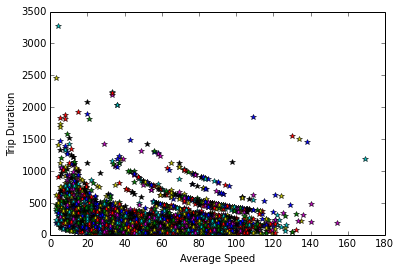

In [8]:
print ("plotting avg_speed vs trip_duration for only 7000 records")

for i in xrange(7000):
    plt.plot(data_before[i][3], data_before[i][1], '*')
    
plt.xlabel("Average Speed")
plt.ylabel("Trip Duration")

print('\n')
print("Reverse proportional relationship .. If the speed is high, then the duration will be low")

# Comment: 
This figure might be less informative .. just because all the segments are plotted ..
Certainely, plotting the avg_speed vs trip_duration for only one segment will be more informative and will have better represenatation .. but the structure of the data so far is not seen as set of segments .. so, currently, we can't do it ! 

### The next step is to write a command that remove any duplicates the might exist 


In [4]:
with open('dataToWorkWith.csv','r') as in_file, open('removedDuplicatesData.csv','w') as out_file:
    seen = set() # set for fast O(1) amortized lookup
    for line in in_file:
        if line in seen: continue # skip duplicate

        seen.add(line)
        out_file.write(line)

### Reading the new file that contains no duplicates ...

In [5]:
data =np.genfromtxt('removedDuplicatesData.csv', delimiter=',',skip_header=True, converters = {2: lambda s: datetime.datetime.strptime(s[1:-1],"%Y-%m-%d %H:%M:%S")})

### Printting out sample of the data ... 

In [6]:
# Data Visualization 
print ("Sample for the inputs, Dependent variables")
for i in xrange(10):
    print(data[i][2], data[i][4], data[i][5])

print('\n') 
print ("Sample for the outputs, independent variables")   
for j in xrange(10):
    print(data[j][1], data[j][3])

Sample for the inputs, Dependent variables
(datetime.datetime(2015, 1, 1, 0, 7, 31), 19920.0, 20040.0)
(datetime.datetime(2015, 1, 1, 0, 10, 11), 20040.0, 20160.0)
(datetime.datetime(2015, 1, 1, 0, 14, 25), 52320.0, 19320.0)
(datetime.datetime(2015, 1, 1, 0, 17, 49), 19440.0, 36480.0)
(datetime.datetime(2015, 1, 1, 0, 20, 6), 13560.0, 13440.0)
(datetime.datetime(2015, 1, 1, 0, 21, 21), 13440.0, 13320.0)
(datetime.datetime(2015, 1, 1, 0, 22, 56), 13200.0, 13080.0)
(datetime.datetime(2015, 1, 1, 0, 25, 57), 13080.0, 12960.0)
(datetime.datetime(2015, 1, 1, 0, 38, 50), 53400.0, 53520.0)
(datetime.datetime(2015, 1, 1, 0, 44, 40), 7560.0, 7680.0)


Sample for the outputs, independent variables
(119.0, 56.0)
(160.0, 50.0)
(125.0, 78.0)
(153.0, 66.0)
(65.0, 57.0)
(74.0, 72.0)
(73.0, 94.0)
(181.0, 98.0)
(41.0, 55.0)
(16.0, 45.0)


In [7]:
print "Number of records before removing duplocates .. ", len(data)

Number of records before removing duplocates ..  696596


In [8]:
print "Number of duplicate rows are ", len(data_before) - len(data)

Number of duplicate rows are  536


### Plotting the ouputs (The speed VS the duration) for 7000 roads ...
This figure is for 7000 roads from the data .. 
We aren't divided the road into segments yet, so, we just plot sample for the roads not for a certain segment



Reverse proportional relationship .. If the speed is high, then the duration will be low


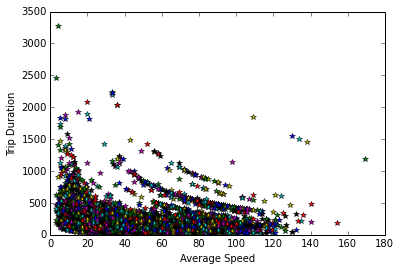

In [55]:
for i in xrange(7000):
    plt.plot(data[i][3], data[i][1], '*')
    
plt.xlabel("Average Speed")
plt.ylabel("Trip Duration")

print('\n')
print("Reverse proportional relationship .. If the speed is high, then the duration will be low")

# Conclusion .. 
This datafile we are working on contains duplicate rows and removing them will minimize the number of records we are working on hence, minimize the complexity of the problem ! .. 

As for the effect of the removed records "graphically" it seems it doesn't matter .. but this is may be becuase we only plot the 1st 7000 records that may not conatain duplicates ! .. 

May be if we plot the whole data, before and after the removal .. we may observe the deleted roads in the later graph .. 

# Question # 2: 
## What about the roadId column ?! .. shall it be part of the inputs ?! and why ?!

The roadId shouldn't be part of the inputs just becuase it doesn't matters due to its uselessness and ineffectiveness in the learning process ..  

### Hence, the next step is to consider the data as a dictionary in each road .. 
and thus, we gonna exclude the "RoadId" from the inputs ..

In [10]:
reader = csv.reader(open('removedDuplicatesData.csv'))

input_data = {}
for row in reader:
    roadID = row[0]
    if roadID in input_data:
        continue
        # duplicate row 
        pass
    input_data[roadID] = row[1:]
    
print "The record related to road # 22680 looks like .. ", input_data["22680"]  #Example

The record related to road # 22680 looks like ..  ['65', '2015-01-01 00:20:06', '57', '13560', '13440']


# Question # 3: 
## What about the Cross validation concept ?! will it be applied in this implementation ?! what are its advantages ?! 

Yes, Cross validation (CV) is going to be applied in this implementation due to its advantages in guaranteeing the robustness of the prediction model .. 

## Advantages of CV:
1. It allows working on a certain portion of the data, say 80% just to train the model 
2. The other 20% are left for the validation .. which is to check if the model already learnt and adjust its paramaters  
2. It guarantees the robustness of the proposed prediction model

## As a prerequisite step, we have to split the data into (Training and Testing) 
(80, 20) Cross Validation will  be applied .. hence, 80% for training and 20% testing 

(50, 50) CV will also be applied and their results will be compared to check id the size of the data matters

In [12]:
# ntrain .. 80% of the data as training data
train = (len(data)*80)/100
ntrain, ntest = data[:train], data[train+1:]

print("len(Training set)" ,len(ntrain))
print("len(Testing set)" ,len(ntest))
print("The length of the data after splitting" ,len(ntest) + len(ntrain))

('len(Training set)', 557276)
('len(Testing set)', 139319)
('The length of the data after splitting', 696595)


# Question # 4: 
## Shall we gonna apply the idea of roadId on the training data as well ?! Why ?!
Yes, we gonna do. As the training the data is an extact portion from the original data .. hence the reasons behid using the roadId as a dictionary are already valid here .. 

# Question # 5: 
## What about the report time ?! Is there any preprocessing that has to be done on ?! 

Yes, it has to be divided into two seperate columns (Day of the week and hour of the day) .. 

### Reasons:
1. To help in making this column as one of the inputs .. 
2. The later representation is more informative as it gives us propoer indication regarding the reason of the crowd if we become aware of the day and at which hour the analysis is being done 

## 1. Training Data:

In [13]:
#reservation
#Training data 
input_data = np.zeros([len(ntrain),2]).astype(np.float32)
train_data = np.zeros([len(ntrain),2]).astype(np.float32)

# Testing data
input_data_test = np.zeros([len(ntest),2]).astype(np.float32)
test_data = np.zeros([len(ntest),2]).astype(np.float32)

#training data
for i in xrange(len(ntrain)):
    weekday = data[i][2].weekday()+1
    hour = data[i][2].hour+1
    input_data[i,:] = [weekday, hour]
    train_data[i,:] = [data[i][1], data[i][3]]
    
print "Sample of Training Data (predicted variables)", '\n', train_data

print "Length of training data", len(train_data)

Sample of Training Data (predicted variables) 
[[ 119.   56.]
 [ 160.   50.]
 [ 125.   78.]
 ..., 
 [ 129.   76.]
 [ 223.   67.]
 [ 187.   81.]]
Length of training data 557276


## 2. Test Data:

In [18]:
for j in xrange(len(ntest)):
    weekday = data[j][2].weekday()+1
    hour = data[j][2].hour+1
    input_data_test[j,:] = [weekday, hour]
    test_data[j,:] = [data[j][1], data[j][3]]
    
print "Sample of Testing Data", '\n', test_data

Sample of Testing Data 
[[ 119.   56.]
 [ 160.   50.]
 [ 125.   78.]
 ..., 
 [ 432.   86.]
 [ 138.   59.]
 [ 224.   78.]]


# Question # 6: 
## Is there a possibility to measure the linear relationship between the independent "input" variables ?! 
YES, through calculating the coorelation coeffecient "r" between the (day_of_the_week and hour_of_the_day)

In [19]:
print "Correlation Matrix between trip Duration and Avg. Speed"
np.corrcoef(input_data[:,0],input_data[:,1])

Correlation Matrix between trip Duration and Avg. Speed


array([[ 1.       ,  0.0499616],
       [ 0.0499616,  1.       ]])

# Comment on the r value .. 
There is a very weak linear relationship between the (day_of_the_week and hour_of_the_day) .. this is observed from the small value and the +ve sign indicates a directly proportional relationship between these variables 

### Reason:
The small value for r might be due to the fact that the road is not considered yet as a set of segments and there are some preprocessing have to be done.

# Question # 7:
## Can we enhance the value of r ?! Is there a possibility for another preprocessing step to be done ?! 

YES, we can consider the road as a set of segments .. 
Hence, the road = roadId + start_landmark + end_landmark 
and thus we might have two roads with the same Id but different segments .. 

In [14]:
## this function returns the inputs, outputs after considering each road as set of segments .. 

def get_input_output_data(data):
    input_data = {}
    output_data = {}
    for i in xrange(len(data)):
        road_id = int(data[i][0])
        start_landmark = int(data[i][4])
        end_landmark = int(data[i][5])
        segment_Id = str(road_id) + "," + str(start_landmark) + "," + str(end_landmark)
        weekday = data[i][2].weekday()+1
        hour = data[i][2].hour+1
        if (segment_Id not in input_data):
            input_data[segment_Id] = np.empty([0,2]).astype(np.float32)
            output_data[segment_Id] = np.empty([0,2]).astype(np.float32)
        input_data[segment_Id] = np.append(input_data[segment_Id], [[weekday, hour]],axis=0)
        output_data[segment_Id] = np.append(output_data[segment_Id], [[data[i][1], data[i][3]]],axis=0) 
    return input_data, output_data

## let's print the input, output data from certain segment ..
i.e. segment "22680,13440,13320"

In [15]:
[input_data, output_data] = get_input_output_data(data)
print "input_data: ", input_data["22680,13440,13320"][:,0], input_data["22680,13440,13320"][:,1]

print "This segment connected to ", len(input_data["22680,13440,13320"][:,0]), "other segments"

input_data:  [ 4.  4.  4. ...,  4.  4.  4.] [  1.   7.  21. ...,  15.  17.  18.]
This segment connected to  1381 other segments


## Comment: 
It's obvious that most of the trips on this segement occur on Thursday at different hours 

# Conclusion so far .. 
The preprocessing phase is done .. 
1. Duplicates are removed ..
2. Graphical, Numerical analysis for the data is done for the sake of data understanding ..
3. The roads are divided into set of segments to facilitate the analysis and the learning process .. 

Now the data data is ready for the learning phase .. 

# Question # 8: 
## What kind of learning has to be applied ?! which algorithm will be used ?!

This is a regression task, as the predicted variable (s) contains numerical values .. 
For simplcity and as a start, Multiple Linear Regression method will be applied .. 

# Question # 9:
## What are the inputs, outputs for multiple linear regression model ?! 

### Inputs:
1. Day of the week 
2. Hour of the day 

### Outputs:
Instead of using both (Trip duration and average speed) during the learning process .. we might use either one .. and this is due to the tight relationship between these two variables .. 
We gonna model using each one seperately then comment on the results of both to proof which one will be more informative and useful in the learning process ..

In [22]:
r = np.corrcoef(output_data["22680,13440,13320"][:,0],output_data["22680,13440,13320"][:,1])
print "The correlation matrix is ", '\n', r

The correlation matrix is  
[[ 1.         -0.72674475]
 [-0.72674475  1.        ]]


## Comment:
There is a strong linear relationship between (avg speed and trip duration) with a reverse direction 
i.e. whenever avg speed increases, trip duration will be decreased  

## - Visual Analysis for the relationship between (avg speed and trip duration)

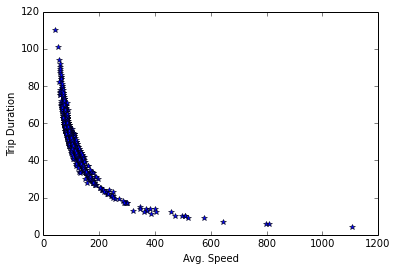

In [23]:
plt.plot(output_data["22680,13440,13320"][:,0],output_data["22680,13440,13320"][:,1],'*' )
plt.xlabel("Avg. Speed")
plt.ylabel("Trip Duration")

## - Plotting Avg speed and trip duration seperately 

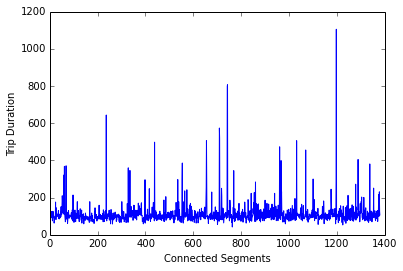

In [24]:
plt.plot(output_data["22680,13440,13320"][:,0])
plt.xlabel("Connected Segments")
plt.ylabel("Trip Duration")

## Comment:
Low fluctuations .. almost constant .. 

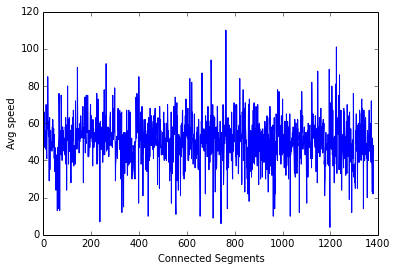

In [25]:
plt.plot(output_data["22680,13440,13320"][:,1])
plt.xlabel("Connected Segments")
plt.ylabel("Avg speed")

## Comment: 
High fluctuations around a constant mean .. 

# Conclusion .. 
The linear relationship between (avg speed and trip duration) is strong and in a reverse direction .. and this is proved numerically and graphically .. 
The next step is to model using each one seperatley to prove which one is more informative .. 

# Question # 10:
## What about the relationship between the input data ?!! 
Let's construct the correlation matrix for the two input variables (Hour of the day and day of the week) ..  

In [33]:
r_input = np.corrcoef(input_data["22680,13440,13320"][:,0],input_data["22680,13440,13320"][:,1])
print "The correlation matrix is ", '\n', r_input

The correlation matrix is  
[[ 1.         -0.00170525]
 [-0.00170525  1.        ]]


# Comment: 
Weak linear relationship between the input variables and the -ve sign indicates a reverse relationship between them .. 

## Multiple Linear Regression model .. 
### Output variable is only (the trip duration) ..

In [27]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=1))

In [28]:
segmentId = "22680,13440,13320" #selected segment to model

input_1 = input_data[segmentId][:,0].astype(np.float32)
input_2 = input_data[segmentId][:,1].astype(np.float32)

input_data_ = [input_1, input_2]
input_data_ = np.transpose(input_data_)
trip_duration = output_data[segmentId][:,0].astype(np.float32)

# #weights
W = init_weights([2, 1])
b = init_weights([1])
# # Construct model
model = tf.matmul(input_data_, W) + b
 
# # Cost
cost = tf.reduce_mean(tf.square(trip_duration-model))
# # Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

The Mean Squared error over 10000 iterations
(0, 18222.434)
(1000, 4559.9023)
(2000, 4383.7476)
(3000, 4251.604)
(4000, 4152.0005)
(5000, 4077.4124)
(6000, 4021.2041)
(7000, 3978.9883)
(8000, 3947.1965)
(9000, 3923.3743)


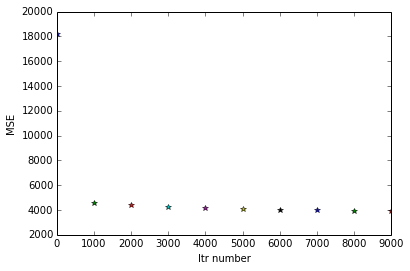

In [30]:
sess = tf.Session()
init = tf.initialize_all_variables()

sess.run(init)

print "The Mean Squared error over 10000 iterations"
for step in xrange(10000):
    _, l=sess.run([optimizer,cost])
    if step % 1000 == 0:
        print(step, l)
        plt.plot(step, l, '*')
        plt.xlabel("Itr number")
        plt.ylabel("MSE")

## Multiple Linear Regression model .. 
### Output variable is only (the Avg Speed) ..

In [31]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=1))

In [32]:
segmentId = "22680,13440,13320" #selected segment to model

input_1 = input_data[segmentId][:,0].astype(np.float32)
input_2 = input_data[segmentId][:,1].astype(np.float32)

input_data_ = [input_1, input_2]
input_data_ = np.transpose(input_data_)
avg_speed = output_data[segmentId][:,1].astype(np.float32)

# #weights
W = init_weights([2, 1])
b = init_weights([1])
# # Construct model
model = tf.matmul(input_data_, W) + b
 
# # Cost
cost = tf.reduce_mean(tf.square(avg_speed-model))
# # Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

The Mean Squared error over 10000 iterations
(0, 1786.7554)
(1000, 283.9118)
(2000, 251.42686)
(3000, 227.01202)
(4000, 208.66615)
(5000, 194.88701)
(6000, 184.52347)
(7000, 176.73973)
(8000, 170.88719)
(9000, 166.47931)


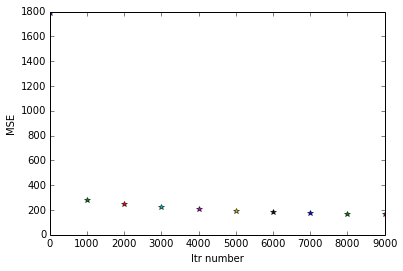

In [34]:
sess = tf.Session()
init = tf.initialize_all_variables()

sess.run(init)

print "The Mean Squared error over 10000 iterations"
for step in xrange(10000):
    _, l=sess.run([optimizer,cost])
    if step % 1000 == 0:
        print(step, l)
        plt.plot(step, l, '*')
        plt.xlabel("Itr number")
        plt.ylabel("MSE")

w_out, intercept = sess.run([W,b])

# Comments: 

1. trip_duration that has less fluctuations, intially it has less cost value and it also has smaller difference between the costs in the 1st 1000 iteration .. 

2. While, Avg_speed fluctuates more than trip_duration and decreases rapidely in the 1st 1000 iteration .. then the difference between each two consecutive iteration become smaller ..

As for the costs after the 1st 1000 iteration .. it has bigger difference between every two consecutive 1000 iteration runs .. 

3. after 10000 iterations, avg speed could acheive less cost (mean squared error) than trip_duration due to its high fluctuations .. 

# Conclusion .. 
It's better to model using trip_duration as dependent variable as it's more informative and gives better (less) cost values.

## - Model Evaluation .. 
### 1. Least squares error .. 
Already calculated .. 

### 2. Coefficient of determination .. 
As this is a linear relationship between the inputs and the output variable .. 
Then we can safely assume that R_squared = (r)^2 

In [34]:
R_squared = np.square(r_input[0,1])
print "R_squared = ", R_squared

R_squared =  2.90788029528e-06


# Comment:
Very very small R_squared value indicates poor prediction model .. 
This means that in only 2.9x10^-6% of all the vaues of the avg_speed, someone can justify them in terms of the input variables (Day of the week and hour of the day) 

# Question # 11: 
## What are the strengths, Limitations of (Linear Regression) model ?!

### Strengths: 
1. Simple 
2. Easy in its implementation 
3. Has good performance whenever the relationship between dependent/ Indepedent variables is Linear 

### Limitations:
1. Senstitive to the size of the dataset 
2. Could't been used to model non-linear relationships
3. Suffers from the overfitting problem


# Question # 12:
## Can we do better ?!
YES, we can try another prediction model that may obtain less cost values .. 
We gonna assume that only (Trip_duration) is the dependent variable that will be predicted, just becuase we have just proved its superiority over the avg_speed variable

## Advanced Model ==> Support Vector for Regression

In [35]:
segmentId = "22680,13440,13320" #selected segment to model
avg_speed = output_data[segmentId][:,1].astype(np.float32)

input_data_ = [input_data["22680,13440,13320"][:,0], input_data["22680,13440,13320"][:,1]]

clf = SVR(C=1.0, epsilon=0.2, kernel = 'rbf')
clf.fit(np.transpose(input_data_),avg_speed)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
score = clf.score(np.transpose(input_data_),avg_speed)
print score

0.249782354303


# Comment: 
This non_linear model obtained better prediction results than the linear one, and this is observed from the large R_squared value .. 
This means that the input variables could effectively justify the values of the output variable (avg_speed) in 25% of the time  

# Question # 13:
## Why Support Vector for Reggression method ?!
### Stengths:
    1. It has a regularisation parameter, which makes the user think about avoiding over-fitting
    2. It uses the kernel trick, so you can build in expert knowledge about the problem via engineering the kernel
    3. In general, SVM is defined by a convex optimisation problem (no local minima) for which there are efficient
    methods
 
### Limitations:
    1. The effectiveness of the results depends on the kernel type
    2.  The loss function used for support vector regression doesn't have an obvious statistical intepretation, often expert knowledge of the problem can be encoded in the loss function, i.e. Poisson or Beta or Gaussian

# Conclusion ..  

So far, the non-linear prediction model outperformed the linear one whil applying on the preprocessed data to predict the avg_speed on a certain segment based only on the (hour of the day and day of the week)

# Question # 14: 
## Can we do better ?! 
## Can we predict the traffic on a road given the avg speed and duration of a certain segment as inputs ?!

Yes, we can .. but this need preprocessing steps .. 
1. We need to find ALL the connected roads for a certain segment .. 
2. Focus only on segments that follow (after) the mentioned segment ..

## Find all segments connected to certain segment .. 
- we are working on the segment "22680,13440,13320" 
- Connected segments are those ones that either starts at the end_landmark of the current segment or ends at the start_landmark of the current segment  

In [37]:
def get_connected_segmets():
    connected_segmets = {}
    for segment_id in input_data:
        # fetch connected roads as any road starting from its end landmark
        # or ending with its start landmark
        start_landmark = segment_id.split(',')[1]
        end_landmark = segment_id.split(',')[2]
        connected_segmets[segment_id] = [];
        for other_segment_id in input_data:
            if (other_segment_id.split(',')[1] == end_landmark):
                connected_segmets[segment_id].append(other_segment_id)
            if (other_segment_id.split(',')[2] == start_landmark):
                connected_segmets[segment_id].append(other_segment_id)
    return connected_segmets

In [38]:
connected_segments = get_connected_segmets()
print "Conneted segments related to the segment['22680,13440,13320'] are:", '\n'
connected_segments['22680,13440,13320']

Conneted segments related to the segment['22680,13440,13320'] are: 



['22680,13680,13440',
 '22680,13560,13440',
 '22560,13320,13560',
 '22560,13320,13440',
 '22560,13320,13440']

## Comment: 
We have 5 segments connected to the segment (22680,13440,13320) ... 4 before this segment and only one after it .. 

We are more intersed with the prior segments if we gonna predict the traffic of the road .. as these allow us to recommend/ decide another road (s) in case a high traffic is expected to be on the current road ..

Hence, we gonna filter only the proir segments ..

In [39]:
# this function returns the connected segments after certain segment
def get_subsequent_segments():
    connected_segments = {}
    # read segements from the input_data
    for segment_id in input_data:
        # fetch connected roads as any road starting from its end landmark
        # or ending with its start landmark
        start_landmark = segment_id.split(',')[1]
        end_landmark = segment_id.split(',')[2]
        connected_segments[segment_id] = []
        for subsequent_segment_id in input_data:
            if ((subsequent_segment_id.split(',')[1] == end_landmark) & (subsequent_segment_id.split(',')[2] != start_landmark)):
                connected_segments[segment_id].append(subsequent_segment_id)
    return connected_segments

In [40]:
sub = get_subsequent_segments()
print "This function returns all the subsequent segments related to the current segment in a one way road"
print '\n', "Examples:",'\n', 'sub["22680,13440,13320"] are:', sub["22680,13440,13320"]

This function returns all the subsequent segments related to the current segment in a one way road

Examples: 
sub["22680,13440,13320"] are: ['22560,13320,13560']


# Question # 15:
## What are the new inputs, outputs for the connected segments ?!
- List of inputs are: 
    1. Day of the week for the current segment 
    2. Hour of the day for the current segment 
    3. Day of the week for the connected segments
    4. Hour of the day for the connected segments
    5. Trip duration for the connected segments
    6. Avg. speed for the connected segments
    
    
- List of outputs: 
    1. Trip duration for the primary "Current" segment 
    2. Avg. speed for the primary segment 

## - Figure out connected segments .. 
- The set of functions below returns the list of inputs and outputs related to the connected segments .. 
- The first one just defines the segment as three main terms (road ID, start landmark and end landmark)

In [41]:
def get_segment_id(data):
    road_id = int(data[0])
    start_landmark = int(data[4])
    end_landmark = int(data[5])
    segment_Id = str(road_id) + "," + str(start_landmark) + "," + str(end_landmark)
    return segment_Id

## This function returns ALL the connected segments ..
before and after the primary segment and even in a two ways road .. 

In [42]:
# only one handeling left .. only following segments need to be seen !
def get_input_output_data_with_connectivity(data):
    data_grouped_by_hour = {}
    
    input_data = {}
    output_data = {}
    for i in xrange(len(data)):
        hour_begin_date = datetime.datetime.strptime(data[i][2].strftime("%Y-%m-%d %H"),"%Y-%m-%d %H")
        hour_ts = int(time.mktime(hour_begin_date.timetuple()))
        if (hour_ts not in data_grouped_by_hour):
            data_grouped_by_hour[hour_ts] = {}
        #again we should do averaging of connected segments data as well
        # we're just taking the last record here
        data_grouped_by_hour[hour_ts][get_segment_id(data[i])] = data[i]
    
    for ts in data_grouped_by_hour:
        curData = data_grouped_by_hour[ts] # this is the data of the current hour 
        for segment_id in curData:
            # If we're averaging by the hour, then we should do it here
            cur_connected_segments = connected_segments[segment_id]
            weekday = curData[segment_id][2].weekday()+1
            hour = curData[segment_id][2].hour+1
            if (segment_id not in input_data):
                input_data[segment_id] = np.empty([0,2+2*len(cur_connected_segments)]).astype(np.float32)
                output_data[segment_id] = np.empty([0,2]).astype(np.float32)
            cur_row_data = [weekday, hour]
            for c in xrange(len(cur_connected_segments)):
                # we add connected segments values if they exist, otherwise their values will be zeros
                other_segment = cur_connected_segments[c]
                other_segment_duration = 0
                other_segment_speed = 0
                if (other_segment in curData):
                    other_segment_duration = curData[other_segment][1]
                    other_segment_speed = curData[other_segment][3]
                cur_row_data.append(other_segment_duration)
                cur_row_data.append(other_segment_speed)
            input_data[segment_id] = np.append(input_data[segment_id], [cur_row_data],axis=0)
            output_data[segment_id] = np.append(output_data[segment_id], [[curData[segment_id][1], curData[segment_id][3]]],axis=0) 
    return input_data, output_data

# Question # 16: 
## Is it true to work on all the connected segments (before and after) ?! what are the benifits of working only in either ?! 
It's more logical to focus on the connected segments only (after) the promary segment .. 
this will help in figure out the crowd segments to avoid them ! .. 

Hence, the next step is to find out only the subsequant segments "Coming function" ..

## Find the segments only (After) primary segment .. 

In [43]:
# only one handeling left .. only following segments need to be seen !
def get_input_output_data_with_connectivity(data):
    data_grouped_by_hour = {}
    
    input_data = {}
    output_data = {}
    for i in xrange(len(data)):
        hour_begin_date = datetime.datetime.strptime(data[i][2].strftime("%Y-%m-%d %H"),"%Y-%m-%d %H")
        hour_ts = int(time.mktime(hour_begin_date.timetuple()))
        if (hour_ts not in data_grouped_by_hour):
            data_grouped_by_hour[hour_ts] = {}
        #again we should do averaging of connected segments data as well
        # we're just taking the last record here
        data_grouped_by_hour[hour_ts][get_segment_id(data[i])] = data[i]
    
    for ts in data_grouped_by_hour:
        curData = data_grouped_by_hour[ts] # this is the data of the current hour 
        for segment_id in curData:
            # If we're averaging by the hour, then we should do it here
            cur_connected_segments = sub[segment_id]
            weekday = curData[segment_id][2].weekday()+1
            hour = curData[segment_id][2].hour+1
            if (segment_id not in input_data):
                input_data[segment_id] = np.empty([0,2+2*len(cur_connected_segments)]).astype(np.float32)
                output_data[segment_id] = np.empty([0,2]).astype(np.float32)
            cur_row_data = [weekday, hour]
            for c in xrange(len(cur_connected_segments)):
                # we add connected segments values if they exist, otherwise their values will be zeros
                other_segment = cur_connected_segments[c]
                other_segment_duration = 0
                other_segment_speed = 0
                if (other_segment in curData):
                    other_segment_duration = curData[other_segment][1]
                    other_segment_speed = curData[other_segment][3]
                cur_row_data.append(other_segment_duration)
                cur_row_data.append(other_segment_speed)
            input_data[segment_id] = np.append(input_data[segment_id], [cur_row_data],axis=0)
            output_data[segment_id] = np.append(output_data[segment_id], [[curData[segment_id][1], curData[segment_id][3]]],axis=0) 
    return input_data, output_data

## The output of the perivous function looks like .. 

In [44]:
input_data, output_data = get_input_output_data_with_connectivity(data) 
print "Day of the week, hour of the day for the current segments + Day and hour for the connected segments: ", '\n', input_data ["22680,13440,13320"]  
print "Trip duration and speed on the connected segments:", '\n', output_data["22680,13440,13320"]

Day of the week, hour of the day for the current segments + Day and hour for the connected segments:  
[[  3.  19.   0.   0.]
 [  5.  21.   0.   0.]
 [  4.  18.   0.   0.]
 ..., 
 [  5.  16.   0.   0.]
 [  3.  16.   0.   0.]
 [  6.  12.   0.   0.]]
Trip duration and speed on the connected segments: 
[[ 107.   49.]
 [ 121.   43.]
 [  98.   54.]
 ..., 
 [ 108.   48.]
 [  77.   59.]
 [ 108.   48.]]


# Question # 17:
## Can we simplify the inputs, outputs before modeling ?!

Yes, we already proved that there is a strong -ve linear relationship between tripduration and avg. speed .. 
Hence, we might use any in the learning phase .. just for simplicity .. 
As we proved that depending on avg speed is more informative and has less error .. we gonna depend only on avg speed as dependent variable .. 
But just for confirmation and double checking .. the coming figure is a plot for the avg speed vs trip duration for the connected segments related to the segment "22680,13440,13320" that we are working on ..

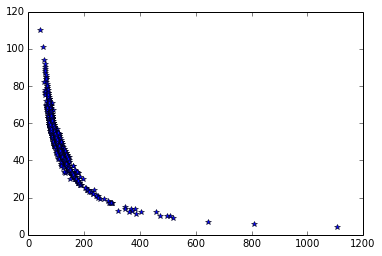

In [45]:
plt.plot(output_data["22680,13440,13320"][:,0],output_data["22680,13440,13320"][:,1],'*' )

# Question # 18: 
## Which learning method gonna be used ?! Why ?!

Multiple linear regression is going to be used .. just for simplicity .. 

- Inputs are: 
    1. Day of the week for the current segment 
    2. Hour of the day for the current segment 
    3. Day of the week for the connected segments
    4. Hour of the day for the connected segments
    5. Trip duration for the connected segments
    6. Avg. speed for the connected segments
    
    
- Outputs: 
    1. Trip duration for the connected segment 

In [26]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=1))

In [50]:
segmentId = "22680,13440,13320" #selected road to model

# i think el nan 3lshan el rows ketera .. I may call hena el fun elli betgeeb el sub bas 
input_data[segmentId] = input_data[segmentId].astype(np.float32)
avg_speed = output_data[segmentId][:,1].astype(np.float32)
cur_connected_segments = sub[segmentId]
#weights
W = init_weights([2+2*len(cur_connected_segments), 1])
b = init_weights([1])
# Construct model
model = tf.matmul(input_data[segmentId], W) + b
 
# Cost
cost = tf.reduce_mean(tf.square(avg_speed-model))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

## Output the loss function values and plotting them over every 1000 iteration .. 

The Mean Squared error over 10000 iterations
(0, 841.23016)
(1000, 290.46585)
(2000, 256.52856)
(3000, 231.15366)
(4000, 212.15527)
(5000, 197.93874)
(6000, 187.3038)
(7000, 179.34694)
(8000, 173.38133)
(9000, 168.93091)


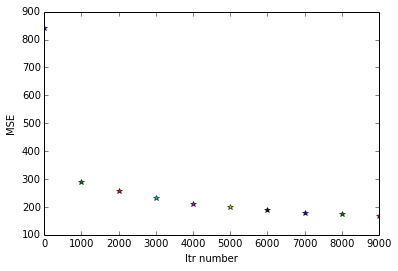

In [51]:
sess = tf.Session()
init = tf.initialize_all_variables()

sess.run(init)

print "The Mean Squared error over 10000 iterations"
for step in xrange(10000):
    _, l=sess.run([optimizer,cost])
    if step % 1000 == 0:
        print(step, l)
        plt.plot(step, l, '*')
        plt.xlabel("Itr number")
        plt.ylabel("MSE")
w_out_2, intercept_2 = sess.run([W,b])

# Comment: 
The last loss function value for this prediction using linear regression model is about 170 .. 
Although the loss function value decreases every 1000 interations (and it decreases heavely in the first 1000 iter) .. It still larger than the last loss function value generated from the previous prediction model (before taking the connected segments inputs into consideration) .. 
This might be because of the large number of connected segments related to this segment.. that increases the number of inputs which make the prediction model to be more complex .. 

let's try another segment and check its connectivity then predict its avg_speed ..

## Try another segment .. 
let's try another segment (i.e. 26160,10080,10200) and check the prediction results ..

In [46]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=1))

In [47]:
segmentId = "26160,10080,10200"; #selected road to model

# i think el nan 3lshan el rows ketera .. I may call hena el fun elli betgeeb el sub bas 
input_data[segmentId] = input_data[segmentId].astype(np.float32)
avg_speed = output_data[segmentId][:,1].astype(np.float32)
cur_connected_segments = sub[segmentId]
#weights
W = init_weights([2+2*len(cur_connected_segments), 1])
b = init_weights([1])
# Construct model
model = tf.matmul(input_data[segmentId], W) + b
 
# Cost
cost = tf.reduce_mean(tf.square(avg_speed-model))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

The Mean Squared error over 10000 iterations
(0, 1525.5632)
(100, 536.09821)
(200, 523.88507)
(300, 517.03302)
(400, 511.48486)
(500, 505.87918)
(600, 500.55789)
(700, 495.48825)
(800, 490.65967)
(900, 485.78445)


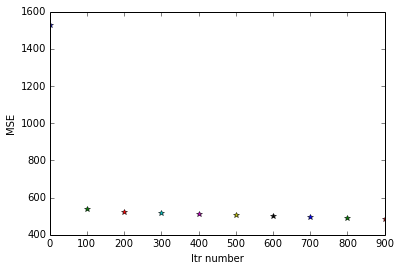

In [49]:
sess = tf.Session()
init = tf.initialize_all_variables()

sess.run(init)

print "The Mean Squared error over 10000 iterations"
for step in xrange(1000):
    _, l=sess.run([optimizer,cost])
    if step % 100 == 0:
        print(step, l)
        plt.plot(step, l, '*')
        plt.xlabel("Itr number")
        plt.ylabel("MSE")

# Comment: 
Larger number of iterations is also tried here (i.e. 1000) but just been ignored becuase it takes large processing time .. Although it's already tried and gave larger cost function values than the 1st segment .. 

In [138]:
connected_segments = get_connected_segmets()
print "Conneted segments related to the segment['26160,10080,10200'] are:", '\n'
connected_segments['26160,10080,10200']

Conneted segments related to the segment['26160,10080,10200'] are: 



['26040,10200,10080', '26040,10200,10080']

In [139]:
sub = get_subsequent_segments()
print "This function returns all the subsequent segments related to the current segment in a one way road"
print '\n', "Examples:",'\n', 'sub["26160,10080,10200"] are:', sub["26160,10080,10200"]

This function returns all the subsequent segments related to the current segment in a one way road

Examples: 
sub["26160,10080,10200"] are: []


# Comment:
The second segment has not got any subsequant segments that follow the primary segment .. 
hence, it has larger cost function value .. that is generated may be from finding other subsequant segments but on different roads .. !

# Try one more segment ..  
Let's select one more segment and find the number of its connected segments .. then run the prediction model .. 
i.e. assume the segment (600,6120,6000) is selected .. 

In [50]:
connected_segments = get_connected_segmets()
print "Conneted segments related to the segment['600,6120,6000'] are:", '\n'
connected_segments['600,6120,6000']

Conneted segments related to the segment['600,6120,6000'] are: 



['720,6000,6120', '720,6000,6120', '720,5760,6120', '600,6000,5760']

In [51]:
sub = get_subsequent_segments()
print "This function returns all the subsequent segments related to the current segment in a one way road"
print '\n', "Examples:",'\n', 'sub["600,6120,6000"] are:', sub["600,6120,6000"]

This function returns all the subsequent segments related to the current segment in a one way road

Examples: 
sub["600,6120,6000"] are: ['600,6000,5760']


In [52]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=1))

In [53]:
segmentId = "600,6120,6000"; #selected road to model

# i think el nan 3lshan el rows ketera .. I may call hena el fun elli betgeeb el sub bas 
input_data[segmentId] = input_data[segmentId].astype(np.float32)
avg_speed = output_data[segmentId][:,1].astype(np.float32)
cur_connected_segments = sub[segmentId]
#weights
W = init_weights([2+2*len(cur_connected_segments), 1])
b = init_weights([1])
# Construct model
model = tf.matmul(input_data[segmentId], W) + b
 
# Cost
cost = tf.reduce_mean(tf.square(avg_speed-model))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [54]:
sess = tf.Session()
init = tf.initialize_all_variables()

sess.run(init)

print "The Mean Squared error over 10000 iterations"
for step in xrange(1000):
    _, l=sess.run([optimizer,cost])
    if step % 100 == 0:
        print(step, l)

The Mean Squared error over 10000 iterations
(0, 11465.567)
(100, nan)
(200, nan)
(300, nan)
(400, nan)
(500, nan)
(600, nan)
(700, nan)
(800, nan)
(900, nan)


# Comment:
The prediction model generates 'nan' as it doesn't have any subsequant connected segments .. neither on the same road nor on a different one ..  
that's why the prediction model couldn't find results !! .. and hence the cost function is nan ! 

# Conclusion: 

- The more connected segments "after" the primary segment ..the more the learning process for the prediction model .. then better results can be generated .. and less cost function values can be obtained ! .. and this is proved by apply the prediction model on 3 different segments .. !


- The implementation for this part guarntees working on only one way in a 2-ways road .. and this is more logical to analyze only one way (forward one) in a two ways road .. 

# - Model Evaluation:

## Correlation Coeffecient for the independent variables ..

In [82]:
r_input = np.corrcoef(input_data["22680,13440,13320"])
print "The correlation matrix is ", '\n', r_input

The correlation matrix is  
[[ 1.          0.99653233  0.99777861 ...,  0.98692553  0.99953451
   0.93626775]
 [ 0.99653233  1.          0.99986162 ...,  0.99691416  0.99860695
   0.96225045]
 [ 0.99777861  0.99986162  1.         ...,  0.99547033  0.99934654
   0.95758968]
 ..., 
 [ 0.98692553  0.99691416  0.99547033 ...,  1.          0.99138338
   0.98064593]
 [ 0.99953451  0.99860695  0.99934654 ...,  0.99138338  1.          0.94654913]
 [ 0.93626775  0.96225045  0.95758968 ...,  0.98064593  0.94654913  1.        ]]


## Comment .. 
There are very strong linear relationship between the independent variables in the 2nd model .. 
again, these independent variables are: 
    1. Day of the week for the current segment 
    2. Hour of the day for the current segment 
    3. Day of the week for the connected segments
    4. Hour of the day for the connected segments
    5. Trip duration for the connected segments
    6. Avg. speed for the connected segments

# Model Evaluation .. 
Calculating R_Squared for the linear model .. 
as this is a linear model .. we may assume that R_squared = (r)^2 .. 

In [88]:
R_squared = np.square(r_input[0,1])
print "R_squared = ", R_squared

R_squared =  0.99307668384


# Question # 19:
## Can we obtain better prediction results ?!! 
Yes, we can .. may be by applying another (more advanced) prediction model .. 
and hence, we gonna try "Support Vector for regression" model .. for simplicity, the built in model from sklearn library is used .. 
and back to work on the segement that gave the least cost error function values (22680,13440,13320) 

In [86]:
segmentId = "22680,13440,13320" #selected segment to model
avg_speed = output_data[segmentId][:,1].astype(np.float32)

clf = SVR(C=1.0, epsilon=0.2, kernel = 'rbf')
clf.fit(input_data[segmentId],avg_speed)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
score = clf.score(input_data["22680,13440,13320"],avg_speed)
print "The R_Squared value is: ", score

The R_Squared value is:  0.259210076918


# Conclusion:
So far we built to prediction models .. 
1. Predict the avg_speed for a cartain segment based on its (Hour of the day, day of the week) values .. 
2. Predict the avg_speed for a primary segment based on ( its (Hour of the day, day of the week) values as well as the hour of the day, day of the week, avg_speed and trip_duration of its connected segments) .. 

Two prediction models are applied .. 
1. Linear Regression 
2. Suport Vector for Regression .. 

The non_linear model outperformed the linear one in the 1st prediction problem .. while the reverse occured in the 2nd one

# Question # 20: 
## What about applying these models on a test data !! .. 
Currently, it's illogical to do that !! .. 
first of all, we have to validate the results of these linear, non_linear models through applying them on unseen data and evlauate thier performance .. 

This is what we gonna do in the next step ..

to be done .. 
validation .. 
time as input 

# - Validatation phase:

## 1. First Prediction Task: 

### 1.1. Linear Regression .. 

In [40]:
Y_model = np.matmul(input_data_test, w_out) + intercept
MSE = np.square(np.mean(Y_model - test_data))
print "The mean squared error for the validation set when applying Linear Regression is: ", MSE

The mean squared error for the validation set when applying Linear Regression is:  8401.6


## Comment:
The mean squared error for linear regression is 8410.6, by applying the linear regression model using the optimal values for the (weights and intercept) .. 
It's obvious that the mean squared error value for the validation process is higher the highest value for the training phase .. and this is a little bit weired as it indicates bad performance for the linear model on the unseen (validation) set ..  

let's try to check the performance of non-linear model .. !

## 2. Second Prediction Task: 


### 2.1.  Linear Regression: 

In [42]:
Y_model_2 = np.matmul(input_data_test, w_out_2) + intercept_2
MSE = np.square(np.mean(Y_model_2 - test_data))
print "The mean squared error for the validation set when applying Linear Regression is: ", MSE

The mean squared error for the validation set when applying Linear Regression is:  8357.84


## Comment:
The loss function for linear regression model in the 2nd prediction phase is better than tht one in the 1st prediction task (As it gives less mean squared error) 

# Final Conclusion: 
    - This notebook is an implementation for the traffic prediction challenge ..
    - This chellenge has two main phases, each of which is a prediction problem .. 
    - Data is divided into (training and validation) datasets using 80, 20 CV 
    - Preprocessing phase is done, where duplicate rows have been removed, hour of the day and day of the week is 
    extracted from the date, time column 
    - RoadID wasn't considered as one of the inputs 
    - The road is divided into set of segments and each segment is analysed seperately 
    
    
## 1st Prediction Problem: 

### Inputs: 

    1. Day of the week 
    2. Time of the day

### Outputs:

    1. Trip Duration 
    2. Average Speed
    
## 2nd Prediction problem:

### Inputs: 

    1. Day of the week for the current segment 
    2. Hour of the day for the current segment 
    3. Day of the week for the connected segments
    4. Hour of the day for the connected segments
    5. Trip duration for the connected segments
    6. Avg. speed for the connected segments

### Outputs: 

     1. Avg. Speed for a primary segment
     
- Two prediction models are used (Linear Regression, SVR)    


- As a result, the non_linear model (SVR) outperformed the linear one in the 2nd problem .. 


- While the reverse occured in the 2nd prediction problem .. the linear model performed better than the non_linear one.. this might occur becuase of reducing the data size, by working on only the subsequant segments of the primary segment, focusing on only one way in the two ways road, instead on working on all connected segments without taking into consideration the way of the road (if it is two way road or only one way) .. 